National Student Loan Data System

Question 1

Q1. Portfolio Composition and Trend Analysis

   File(s) Used: Portfolio_Summary.csv

Question: Analyze the total Federal Student Aid portfolio.
1. Load and clean the Portfolio_Summary.csv data, handling the header rows and currency formats.
2. Calculate the total outstanding dollar balance (Direct Loans + FFEL + Perkins) for each Federal Fiscal Year.
3. Visualize the three loan types' outstanding dollar balances (in billions) over time on a single line chart to show their respective trends and market share changes.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('Portfolio_Summary.csv', header=4)

In [26]:
new_columns = {
    df.columns[0]: 'FFY',
    df.columns[1]: 'Q',
    df.columns[2]: 'DL_Dollars_Billion',
    df.columns[4]: 'FFEL_Dollars_Billion',
    df.columns[6]: 'Perkins_Dollars_Billion'
}
df = df.rename(columns=new_columns)

In [27]:
df_analysis = df[['FFY', 'Q', 'DL_Dollars_Billion', 'FFEL_Dollars_Billion', 'Perkins_Dollars_Billion']].copy()

In [28]:
df_analysis['FFY'] = df_analysis['FFY'].ffill()

In [29]:
df_analysis = df_analysis.dropna(subset=['Q'])

In [30]:
def clean_currency(col):
    return col.astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip().str.replace(r'NA', '0', regex=False)

In [31]:
for col in ['DL_Dollars_Billion', 'FFEL_Dollars_Billion', 'Perkins_Dollars_Billion']:
    df_analysis[col] = clean_currency(df_analysis[col]).astype(float)

In [32]:
df_analysis['Time'] = df_analysis['FFY'].astype(int).astype(str) + '-' + df_analysis['Q'].astype(str)
df_analysis = df_analysis[df_analysis['Q'].str.contains('Q[1-4]', na=False)]

Text(0, 0.5, 'Dollars Outstanding (in billions)')

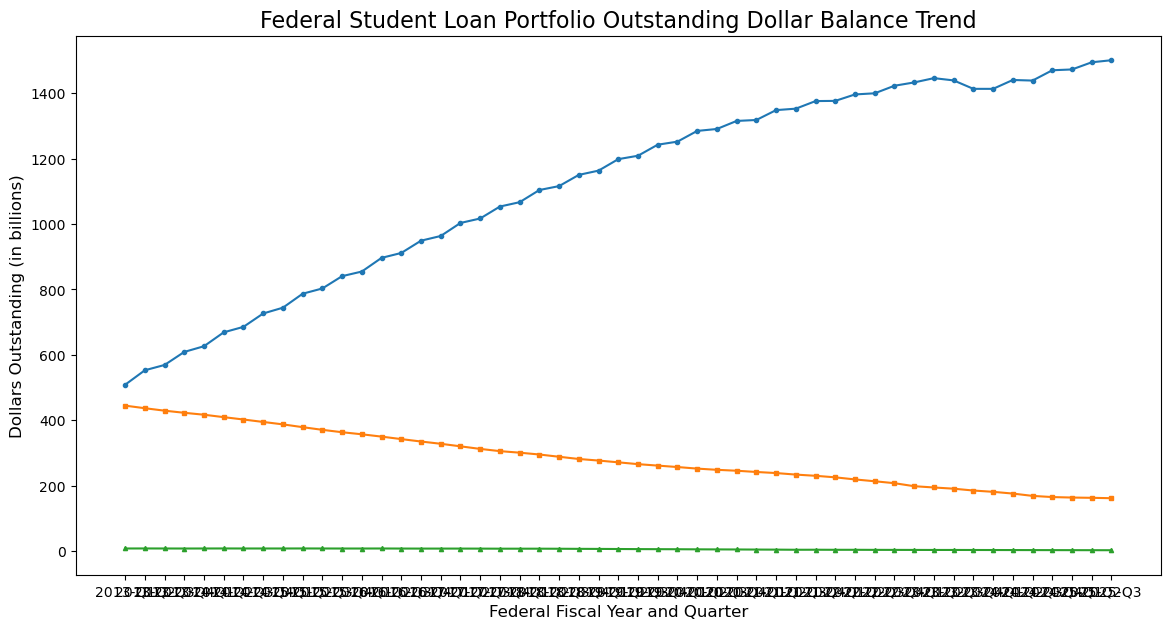

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(df_analysis['Time'], df_analysis['DL_Dollars_Billion'], label='Direct Loans (DL)', marker='o', markersize=3)
plt.plot(df_analysis['Time'], df_analysis['FFEL_Dollars_Billion'], label='FFEL', marker='s', markersize=3)
plt.plot(df_analysis['Time'], df_analysis['Perkins_Dollars_Billion'], label='Perkins Loans', marker='^', markersize=3)
plt.title('Federal Student Loan Portfolio Outstanding Dollar Balance Trend', fontsize=16)
plt.xlabel('Federal Fiscal Year and Quarter', fontsize=12)
plt.ylabel('Dollars Outstanding (in billions)', fontsize=12)

In [41]:
print(df_analysis.columns.tolist())


['FFY', 'Q', 'DL_Dollars_Billion', 'FFEL_Dollars_Billion', 'Perkins_Dollars_Billion', 'Time']


In [42]:
df_analysis.head()


,FFY,Q,DL_Dollars_Billion,FFEL_Dollars_Billion,Perkins_Dollars_Billion,Time
7,2013,Q1,508.7,444.9,8.2,2013-Q1
8,2013,Q2,553.0,437.0,8.3,2013-Q2
9,2013,Q3,569.2,429.5,8.2,2013-Q3
10,2013,Q4,609.1,423.0,8.1,2013-Q4
11,2014,Q1,626.5,417.1,8.2,2014-Q1


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('Portfolio_Summary.csv', header=4)

In [48]:
df_analysis['Time'] = df_analysis['FFY'].astype(int).astype(str) + '-' + df_analysis['Q'].astype(str)
df_analysis = df_analysis[df_analysis['Q'].str.contains('Q[1-4]', na=False)]

In [50]:
n = 4
tick_locations = range(0, len(all_time_labels), n)
tick_labels = [all_time_labels[i] for i in tick_locations]

plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

C:\Users\KARAN SANJAY DUKARE\AppData\Local\Temp\ipykernel_10784\4176430042.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Loan Type')


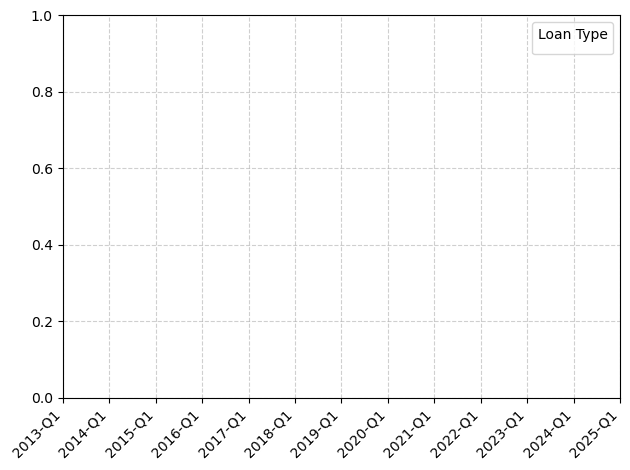

In [51]:
plt.xticks(tick_locations, tick_labels, rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Loan Type')
plt.tight_layout()
plt.savefig('portfolio_trend_analysis_fixed.png')

Question 2

Q2. Default Rate Movement
    
File(s) Used: DL_Entering_Defaults.csv

Question: Examine the quarterly trend of Direct Loans entering default.

1. Load and clean the DL_Entering_Defaults.csv file, ensuring the percentage columns are treated as numerical data.
2. Plot the "Percent of Borrowers in Repayment Last Quarter That Defaulted" over the Federal Fiscal Year and Quarter.
3. Identify and report the top 5 quarters with the highest percentage of borrowers entering default.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df = pd.read_csv('DL_Entering_Defaults.csv', header=4, encoding='latin1')

In [55]:
df.rename(columns={
    df.columns[0]: 'FFY',
    df.columns[1]: 'Q',
    df.columns[6]: 'Borrower_Default_Rate_Pct'
}, inplace=True)

In [56]:
df_analysis = df[['FFY', 'Q', 'Borrower_Default_Rate_Pct']].copy()
df_analysis['FFY'] = df_analysis['FFY'].ffill()
df_analysis.dropna(subset=['Q'], inplace=True)

In [57]:
# Convert the percentage column to float
df_analysis['Borrower_Default_Rate_Pct'] = (
    df_analysis['Borrower_Default_Rate_Pct']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .replace('NA', np.nan)
    .astype(float)
)

In [58]:
df_analysis['Time'] = df_analysis['FFY'].astype(int).astype(str) + '-' + df_analysis['Q'].astype(str)
df_analysis = df_analysis[df_analysis['Q'].str.contains('Q[1-4]', na=False)].reset_index(drop=True)

In [59]:
# Identify top 5
top_5_defaults = df_analysis.sort_values(
    by='Borrower_Default_Rate_Pct',
    ascending=False
).head(5)

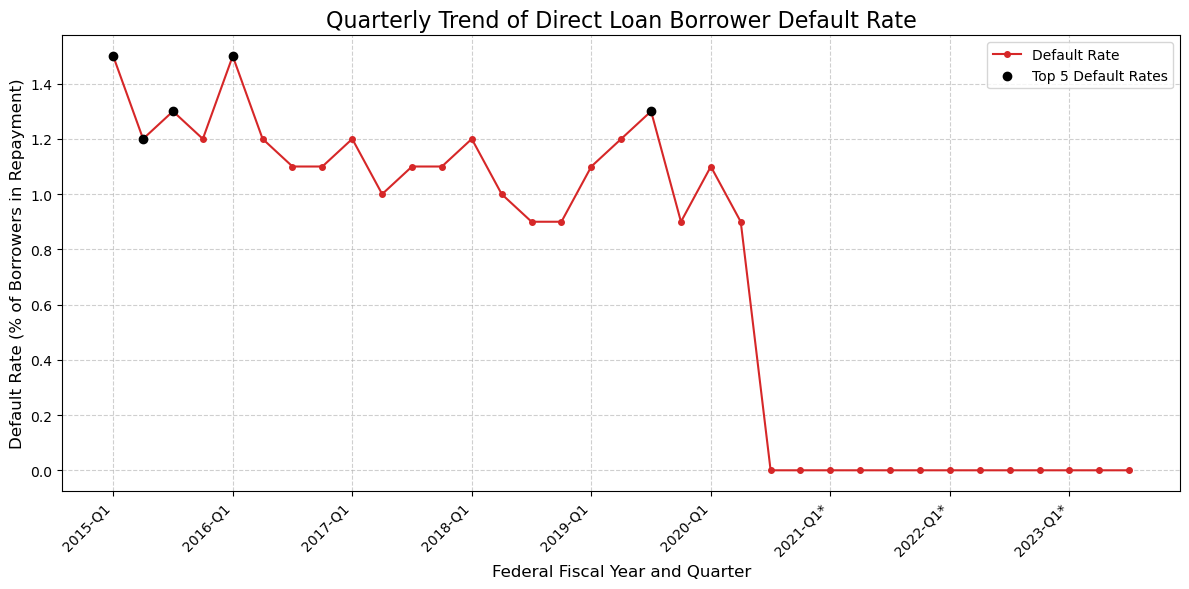

In [63]:
# --- Plotting ---
all_time_labels = df_analysis['Time'].tolist()
n = 4
tick_locations = range(0, len(all_time_labels), n)
tick_labels = [all_time_labels[i] for i in tick_locations]

plt.figure(figsize=(12, 6))
plt.plot(
    df_analysis['Time'],
    df_analysis['Borrower_Default_Rate_Pct'],
    label='Default Rate',
    marker='o',
    markersize=4,
    color='tab:red'
)
plt.scatter(
    top_5_defaults['Time'],
    top_5_defaults['Borrower_Default_Rate_Pct'],
    color='black',
    label='Top 5 Default Rates',
    zorder=5
)

plt.title('Quarterly Trend of Direct Loan Borrower Default Rate', fontsize=16)
plt.xlabel('Federal Fiscal Year and Quarter', fontsize=12)
plt.ylabel('Default Rate (% of Borrowers in Repayment)', fontsize=12)
plt.xticks(tick_locations, tick_labels, rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('dl_default_rate_trend.png')

Question 3

Q3. Repayment Plan Dominance
    
    File(s) Used: DL_Portfolio_by_Repayment_Plan.csv

Question: Determine the most significant Direct Loan repayment plans by outstanding balance.

1. Load and clean the DL_Portfolio_by_Repayment_Plan.csv file.
2. For the latest Federal Fiscal Quarter available in the data, calculate the percentage of total outstanding Direct Loan dollars for each repayment plan.
3. Create a pie chart to visualize the distribution of outstanding dollars for the three largest repayment plans (e.g., SAVE, Income-Based, Income-Contingent) and group all others into an "Other" category.

In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [67]:
df = pd.read_csv('DL_Portfolio_by_Repayment_Plan.csv', header=5)

In [68]:
df = pd.read_csv('DL_Portfolio_by_Repayment_Plan.csv', header=5)
dollar_cols_indices = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
plan_names = [
    'Level: 10 Yrs or Less', 'Level: > 10 Yrs', 'Graduated: 10 Yrs or Less',
    'Graduated: > 10 Yrs', 'Income-Contingent (ICR)', 'Income-Based (IBR)',
    'Pay As You Earn (PAYE)', 'SAVE', 'Alternative', 'Other'
]
col_map = {df.columns[0]: 'FFY', df.columns[1]: 'Q'}
for idx, name in zip(dollar_cols_indices, plan_names):
    col_map[df.columns[idx]] = name
df_analysis = df[list(col_map.keys())].rename(columns=col_map).copy()
df_analysis['FFY'] = df_analysis['FFY'].ffill()
df_analysis.dropna(subset=['Q'], inplace=True)
df_analysis = df_analysis[df_analysis['Q'].str.contains('Q[1-4]', na=False)].reset_index(drop=True)

In [69]:
def clean_and_convert_dollars(series):
    cleaned_series = (
        series.astype(str)
        .str.replace(r'[\$,]', '', regex=True)
        .str.replace(r'\*+', '', regex=True)
        .str.strip()
    )
    cleaned_series = cleaned_series.replace(r'N/A|-$|^\s*$', np.nan, regex=True)
    numeric_series = pd.to_numeric(cleaned_series, errors='coerce')
    return numeric_series.fillna(0)

In [70]:
for col in plan_names:
    df_analysis[col] = clean_and_convert_dollars(df_analysis[col])

In [71]:
latest_quarter = df_analysis.iloc[-1]
latest_time = str(int(latest_quarter['FFY'])) + '-' + latest_quarter['Q']
latest_balances = latest_quarter[plan_names]
total_balance = latest_balances.sum()
plan_percentages = (latest_balances / total_balance) * 100
df_percentages = pd.DataFrame({
    'Plan': plan_names,
    'Balance (Billion)': latest_balances.values,
    'Percentage': plan_percentages.values
}).sort_values(by='Balance (Billion)', ascending=False).reset_index(drop=True)

In [72]:
top_n = 3
top_plans_df = df_percentages.head(top_n).copy()
other_balance = df_percentages.iloc[top_n:]['Balance (Billion)'].sum()
other_percentage = df_percentages.iloc[top_n:]['Percentage'].sum()
plot_data = top_plans_df[['Plan', 'Balance (Billion)', 'Percentage']].copy()
plot_data.loc[len(plot_data)] = ['Other Repayment Plans', other_balance, other_percentage]

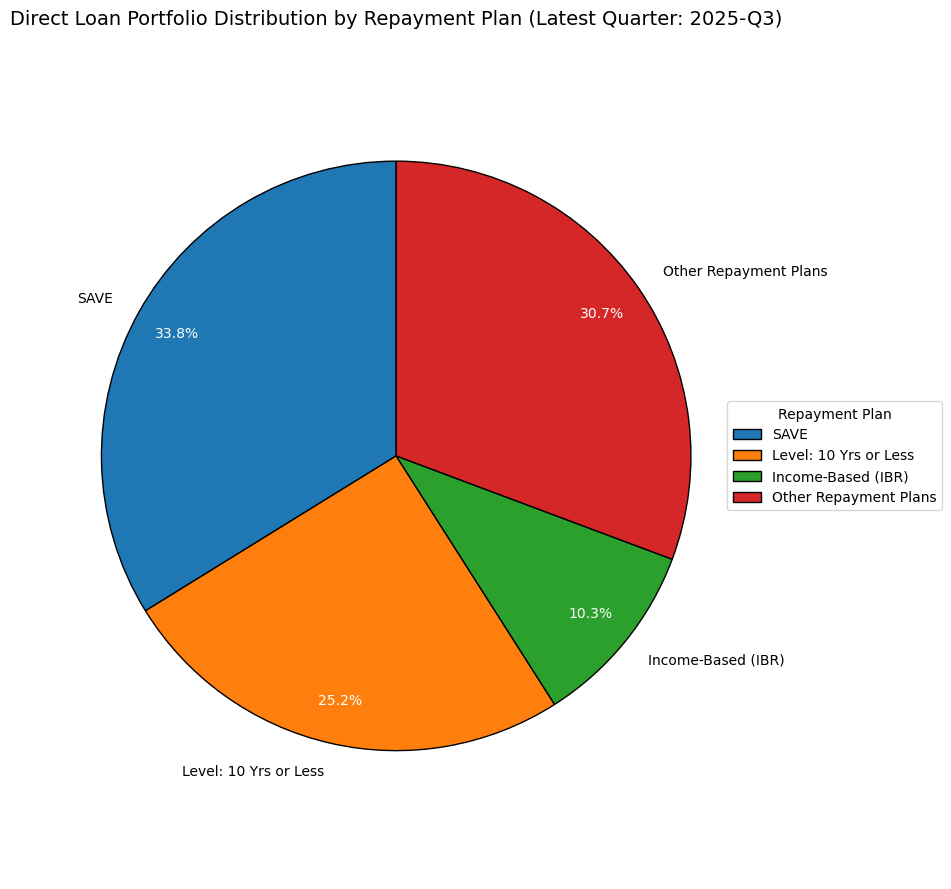

In [73]:
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    plot_data['Balance (Billion)'],
    labels=plot_data['Plan'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    wedgeprops={'edgecolor': 'black'}
)
plt.title(f'Direct Loan Portfolio Distribution by Repayment Plan (Latest Quarter: {latest_time})', fontsize=14)
plt.axis('equal')
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(wedges, plot_data['Plan'], title="Repayment Plan", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.savefig('dl_repayment_plan_dominance.png')

Question 4 

Q4. Forbearance vs. Deferment Trend Comparison
    
    File(s) Used: DL_by_Forbearance_Type.csv, DL_by_Deferment_Type.csv

Question: Compare the use of forbearance versus deferment over time for Direct Loans.

1. Load and clean both DL_by_Forbearance_Type.csv and DL_by_Deferment_Type.csv.
2. For each quarter, calculate the Total Dollars in Forbearance (summing all forbearance types) and the Total Dollars in Deferment (summing all deferment types).
3. Plot the two totals on a dual-axis line chart over time to visually compare the overall outstanding dollar balance in each status.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# --- 1. Load and Clean Deferment Data (DL_by_Deferment_Type.csv) ---
# Use encoding='latin1' or 'ISO-8859-1' to avoid UnicodeDecodeError
df_deferment = pd.read_csv(
    'DL_by_Deferment_Type.csv',
    header=6,
    skipinitialspace=True,
    encoding='latin1'  # FIX: avoids UnicodeDecodeError
)


In [4]:
# Fill forward the Federal Fiscal Year and rename the Quarter column
df_deferment['Federal Fiscal Year'] = df_deferment[df_deferment.columns[0]].ffill()
df_deferment = df_deferment.rename(columns={df_deferment.columns[1]: 'Quarter'})


In [5]:
# Identify Dollar Outstanding columns (in billions)
deferment_dollar_cols = [col for col in df_deferment.columns if 'Dollars Outstanding' in col]


In [6]:
# Clean and sum the dollar columns
for col in deferment_dollar_cols:
    df_deferment[col] = (
        df_deferment[col]
        .astype(str)
        .str.replace(r'[$,\s]', '', regex=True)
        .replace({'N/A': np.nan, '*': np.nan})
    )
    df_deferment[col] = pd.to_numeric(df_deferment[col], errors='coerce')


In [7]:
# Calculate Total Dollars in Deferment (in billions)
df_deferment['Total Deferment Dollars (B)'] = df_deferment[deferment_dollar_cols].sum(axis=1)

# Keep necessary columns
df_deferment = (
    df_deferment[['Federal Fiscal Year', 'Quarter', 'Total Deferment Dollars (B)']]
    .dropna(subset=['Federal Fiscal Year', 'Quarter'])
    .reset_index(drop=True)
)

In [8]:
# --- 2. Load and Clean Forbearance Data (DL_by_Forbearance_Type.csv) ---
df_forbearance = pd.read_csv(
    'DL_by_Forbearance_Type.csv',
    header=5,
    skipinitialspace=True,
    encoding='latin1'  # FIX: avoids UnicodeDecodeError
)

df_forbearance['Federal Fiscal Year'] = df_forbearance[df_forbearance.columns[0]].ffill()
df_forbearance = df_forbearance.rename(columns={df_forbearance.columns[1]: 'Quarter'})


In [9]:
# Identify Dollar Outstanding columns
forbearance_dollar_cols = [col for col in df_forbearance.columns if 'Dollars Outstanding' in col]


In [10]:
# Clean and sum the dollar columns
for col in forbearance_dollar_cols:
    df_forbearance[col] = (
        df_forbearance[col]
        .astype(str)
        .str.replace(r'[$,\s]', '', regex=True)
        .replace({'N/A': np.nan, '*': np.nan})
    )
    df_forbearance[col] = pd.to_numeric(df_forbearance[col], errors='coerce')

df_forbearance['Total Forbearance Dollars (B)'] = df_forbearance[forbearance_dollar_cols].sum(axis=1)

df_forbearance = (
    df_forbearance[['Federal Fiscal Year', 'Quarter', 'Total Forbearance Dollars (B)']]
    .dropna(subset=['Federal Fiscal Year', 'Quarter'])
    .reset_index(drop=True)
)

In [11]:
# --- 3. Merge and Prepare for Plotting ---
df_merged = pd.merge(
    df_deferment,
    df_forbearance,
    on=['Federal Fiscal Year', 'Quarter'],
    how='inner'
)

In [12]:
# Create a proper date column for plotting
df_merged['Date'] = (
    df_merged['Federal Fiscal Year'].astype(int).astype(str)
    + '-'
    + df_merged['Quarter'].str.replace(r'\*$', '', regex=True)
)


In [13]:
# Map quarters to representative months
df_merged['Date'] = (
    df_merged['Date']
    .str.replace('Q1', '01-01')
    .str.replace('Q2', '04-01')
    .str.replace('Q3', '07-01')
    .str.replace('Q4', '10-01')
)
df_merged['Date'] = pd.to_datetime(df_merged['Date'], format='%Y-%m-%d', errors='coerce')


In [ ]:
# Drop any invalid dates
df_merged = df_merged.dropna(subset=['Date']).set_index('Date').sort_index()

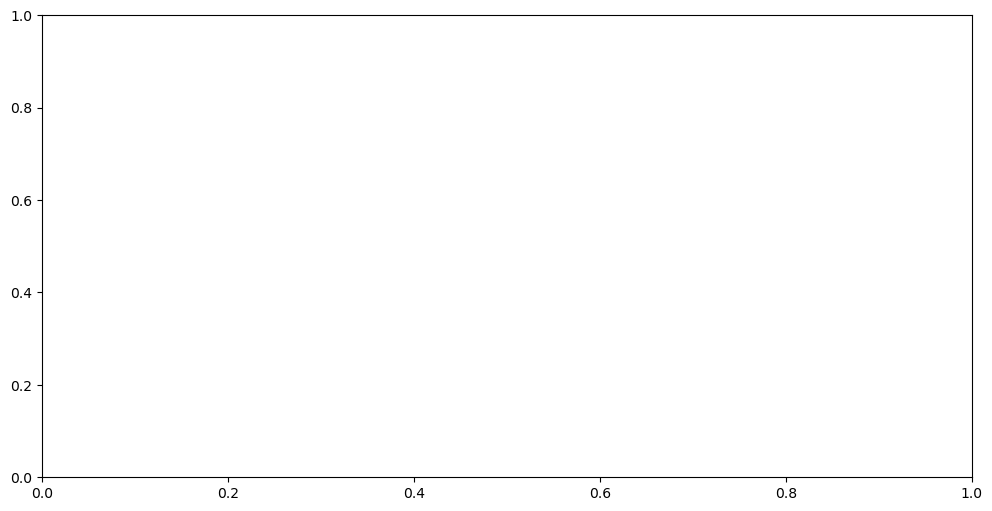

In [14]:
# --- 4. Plot the two totals on a dual-axis line chart ---
fig, ax1 = plt.subplots(figsize=(12, 6))


In [15]:
# Primary axis (Deferment)
color_deferment = 'tab:blue'
ax1.set_xlabel('Federal Fiscal Year and Quarter')
ax1.set_ylabel('Total Deferment Dollars (in billions)', color=color_deferment)
line1, = ax1.plot(df_merged.index, df_merged['Total Deferment Dollars (B)'],
                  color=color_deferment, label='Total Deferment Dollars (B)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_deferment)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, linestyle='--', alpha=0.6)


In [16]:
# Secondary axis (Forbearance)
ax2 = ax1.twinx()
color_forbearance = 'tab:red'
ax2.set_ylabel('Total Forbearance Dollars (in billions)', color=color_forbearance)
line2, = ax2.plot(df_merged.index, df_merged['Total Forbearance Dollars (B)'],
                  color=color_forbearance, label='Total Forbearance Dollars (B)', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_forbearance)


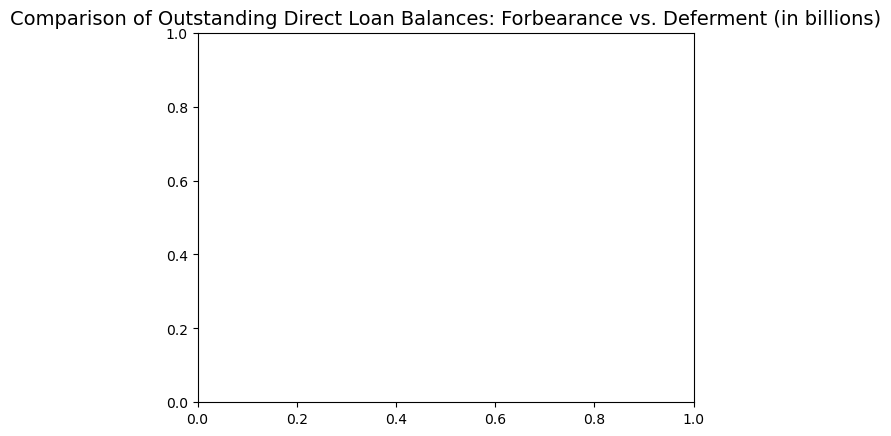

In [17]:
# Title & Legend
plt.title('Comparison of Outstanding Direct Loan Balances: Forbearance vs. Deferment (in billions)', fontsize=14)
lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')


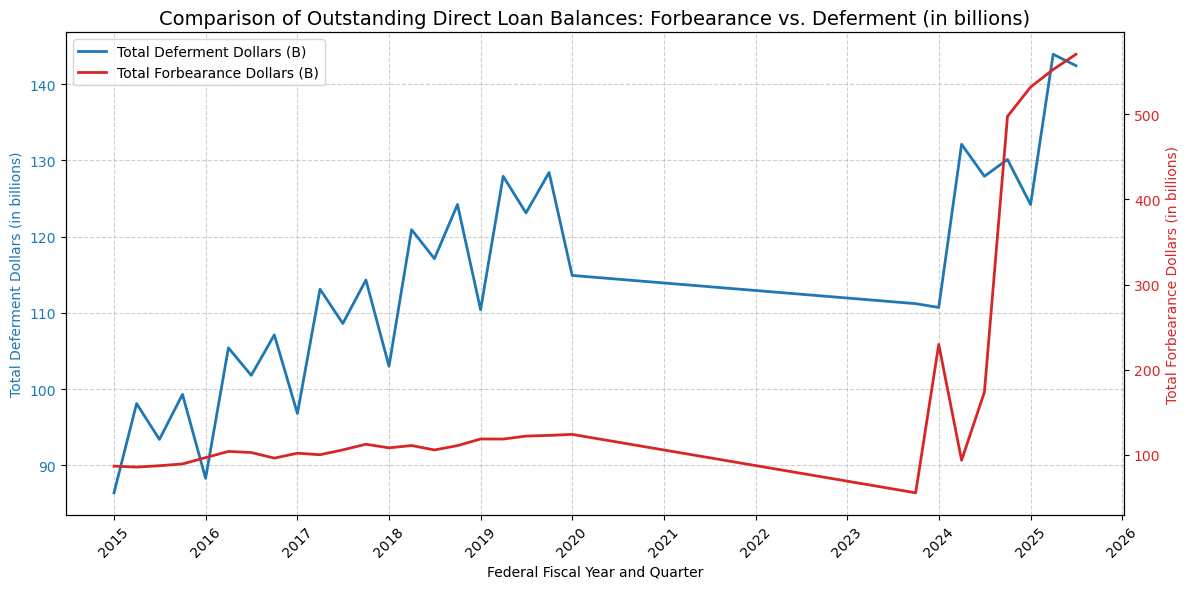

In [2]:
# Format X-axis with readable date labels
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.tight_layout()
plt.savefig('forbearance_vs_deferment_trend.png')
plt.show()


Question 5

Q5. FFEL Loan Servicer Transition

    File(s) Used: Location_of_FFELP_Loans.csv

Question: Analyze the shift in where FFEL Program loans are held.

1. Load and clean the Location_of_FFELP_Loans.csv file.
2. Plot the outstanding dollar balance (in billions) over time for:
    * Commercial Lender Held
    * ED Federal Loan Servicers
3. Determine the first Federal Fiscal Quarter where the outstanding dollar balance held by ED Federal Loan Servicers exceeded the balance held by Commercial Lenders.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [20]:
# --- 1. Load and Clean Data ---
# Load with header=5 and encoding='cp1252' to handle file formatting and resolve UnicodeDecodeError
file_path = 'Location_of_FFELP_Loans.csv'
df = pd.read_csv(file_path, header=5, skipinitialspace=True, encoding='cp1252')


In [21]:
# Fill forward the Federal Fiscal Year (Column 0) and rename the Quarter column (Column 1)
df['Federal Fiscal Year'] = df[df.columns[0]].ffill()
df = df.rename(columns={df.columns[1]: 'Quarter'})


In [22]:
# Define the columns to analyze based on the header structure:
# 'Commercial Lender Held' dollars is at index 2
COL_COMMERCIAL = df.columns[2]
# 'ED Federal Loan Servicers' dollars is at index 4
COL_ED_SERVICERS = df.columns[4]


In [23]:
# Select and drop rows where Year/Quarter is missing
df = df[['Federal Fiscal Year', 'Quarter', COL_COMMERCIAL, COL_ED_SERVICERS]].dropna(subset=['Federal Fiscal Year', 'Quarter']).reset_index(drop=True)


In [24]:
# Function to clean and convert dollar columns
def clean_dollar_column(series):
    # Remove '$', ',', and spaces
    series = series.astype(str).str.replace(r'[$,\s]', '', regex=True)
    # Convert to numeric, coercing errors to NaN
    return pd.to_numeric(series, errors='coerce')

df['Commercial Lender Held (B)'] = clean_dollar_column(df[COL_COMMERCIAL])
df['ED Federal Loan Servicers (B)'] = clean_dollar_column(df[COL_ED_SERVICERS])


In [25]:
# Drop any rows where the key dollar values are NaN
df = df.dropna(subset=['Commercial Lender Held (B)', 'ED Federal Loan Servicers (B)'])


In [26]:
# Create a proper time index column
df['Date'] = df['Federal Fiscal Year'].astype(int).astype(str) + '-' + df['Quarter'].str.replace(r'\*$', '', regex=True).str.replace('Q', 'Q', regex=False)
# Map quarters to month starts for date creation
df['Date'] = pd.to_datetime(
    df['Date']
    .str.replace('Q1', '01-01')
    .str.replace('Q2', '04-01')
    .str.replace('Q3', '07-01')
    .str.replace('Q4', '10-01'),
    format='%Y-%m-%d'
)
df = df.set_index('Date').sort_index()


In [27]:
# --- 2. Determine the Crossover Quarter ---
# Find the first quarter where ED Servicers balance > Commercial Lenders balance
crossover_data = df[df['ED Federal Loan Servicers (B)'] > df['Commercial Lender Held (B)']]

crossover_quarter = "The ED Federal Loan Servicers balance never exceeded the Commercial Lenders balance in the available data."
if not crossover_data.empty:
    first_crossover = crossover_data.iloc[0]
    
    # Corrected string manipulation for the output string
    quarter_raw = str(first_crossover['Quarter'])
    quarter_cleaned = quarter_raw.replace('Q', '').replace('*', '').strip()
    crossover_quarter = f"{int(first_crossover['Federal Fiscal Year'])} Q{quarter_cleaned}"


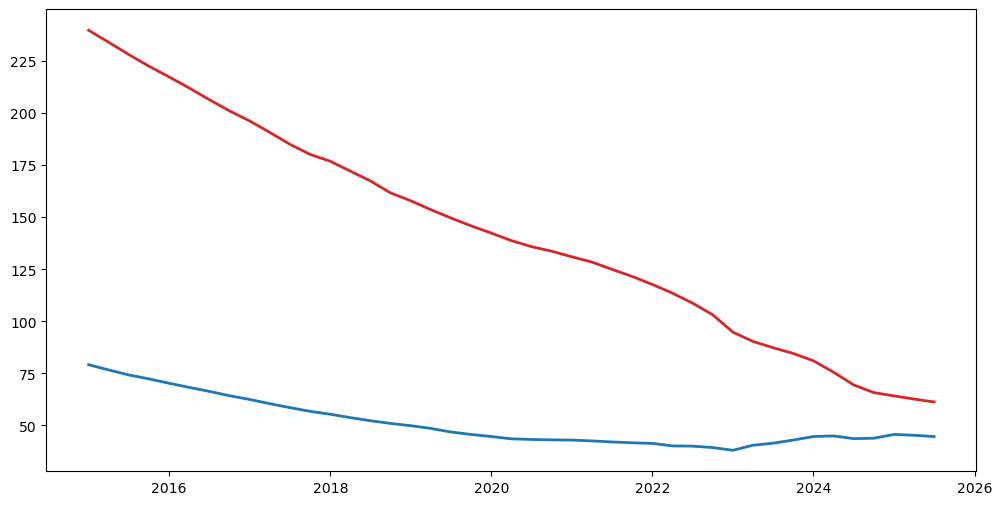

In [28]:
# --- 3. Plot the data ---
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Commercial Lender Held (B)'], label='Commercial Lender Held (B)', color='tab:red', linewidth=2)
plt.plot(df.index, df['ED Federal Loan Servicers (B)'], label='ED Federal Loan Servicers (B)', color='tab:blue', linewidth=2)


In [29]:
# Mark the crossover point if it exists
if 'The ED Federal Loan Servicers' not in crossover_quarter:
    crossover_date = first_crossover.name
    crossover_y_value = first_crossover['ED Federal Loan Servicers (B)']
    plt.scatter(crossover_date, crossover_y_value, color='black', zorder=5, label=f'Crossover: {crossover_quarter}')
    plt.axvline(crossover_date, color='grey', linestyle='--', linewidth=1)


C:\Users\KARAN SANJAY DUKARE\AppData\Local\Temp\ipykernel_25200\4175851075.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Loan Holder')


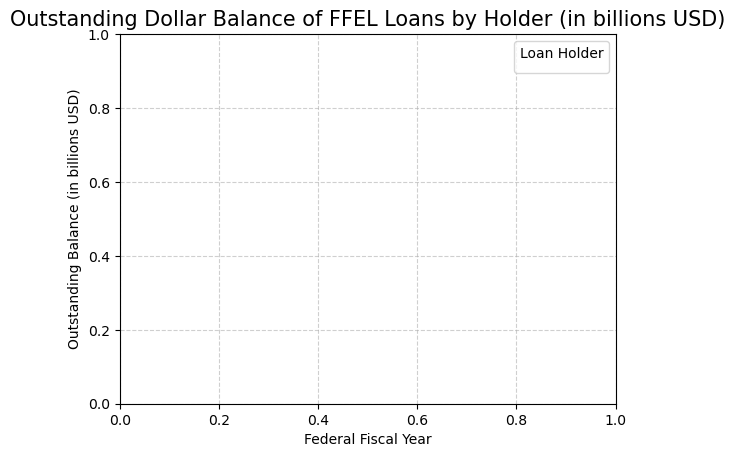

In [30]:
# Formatting
plt.title('Outstanding Dollar Balance of FFEL Loans by Holder (in billions USD)', fontsize=15)
plt.xlabel('Federal Fiscal Year')
plt.ylabel('Outstanding Balance (in billions USD)')
plt.legend(title='Loan Holder')
plt.grid(True, linestyle='--', alpha=0.6)


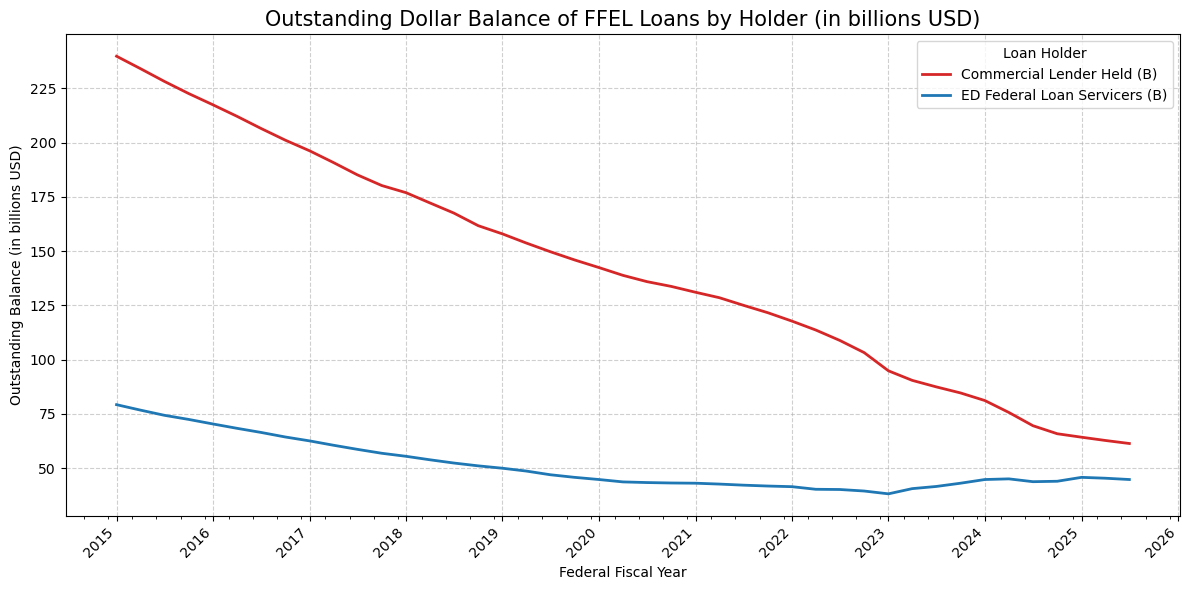

In [18]:
# Auto-adjust x-axis ticks to be readable and show Year Quarter format
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3)) # Quarterly marks

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('ffel_loan_servicer_transition.png')

Question 6

Q6. Loan Forgiveness Effectiveness

    File(s) Used: TLF.csv

Question: Analyze the dollar amount forgiven per borrower under the Teacher Loan Forgiveness (TLF) program.

1.	Load and clean the TLF.csv file.
2.	For each fiscal year, calculate the Average Dollar Forgiven Per Borrower for both the FFEL Program and the Direct Loan Program.
3.	Create a bar chart showing the average forgiven amount per borrower by year, stacked or grouped by loan program type (DL vs. FFEL).


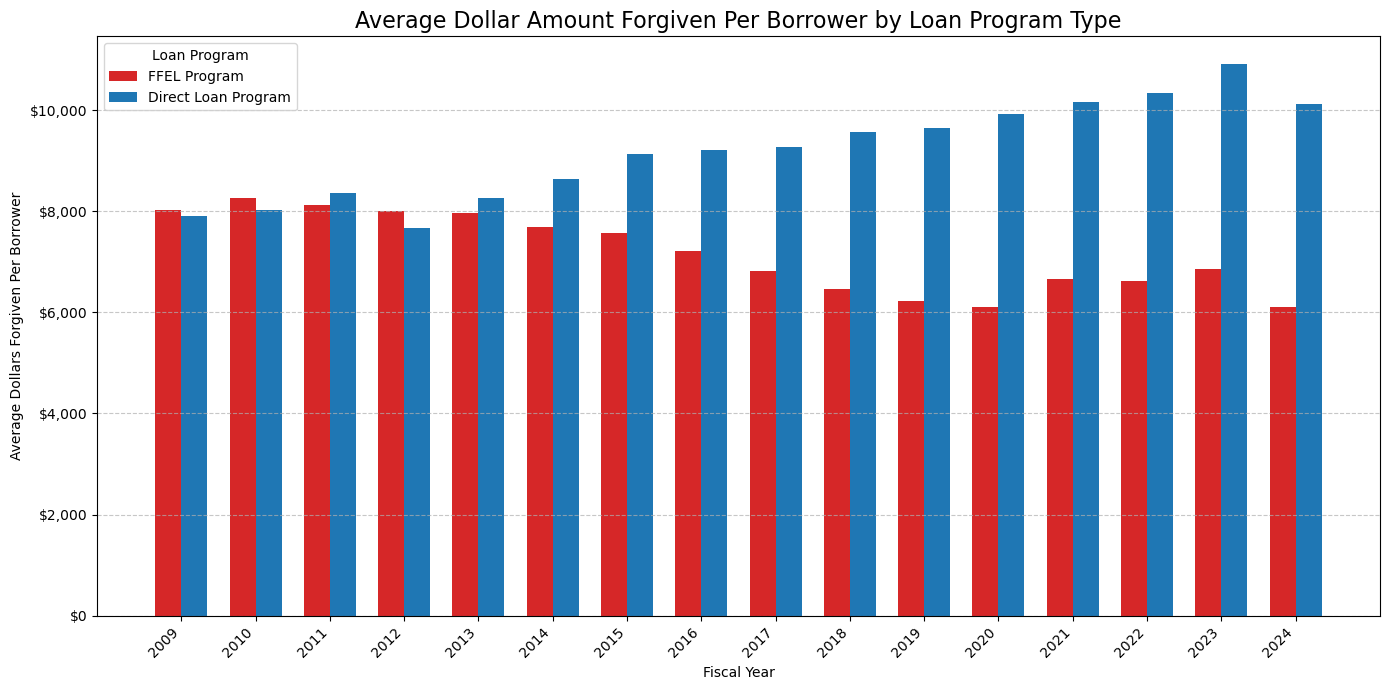

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- 1. Load and Clean Data ---
file_path = 'TLF.csv'
# Load with header=6 and encoding='cp1252' to handle file formatting
df = pd.read_csv(file_path, header=6, skipinitialspace=True, encoding='cp1252')

# Drop all columns after the first five (Fiscal Year and the two program data pairs)
df = df.iloc[:, :5]

# Define columns of interest by their headers from the file
COL_YEAR = df.columns[0]
COL_FFEL_DOLLARS = df.columns[1]
COL_FFEL_BORROWERS = df.columns[2]
COL_DL_DOLLARS = df.columns[3]
COL_DL_BORROWERS = df.columns[4]

# Clean and convert the dollar and borrower columns
cols_to_clean = [COL_FFEL_DOLLARS, COL_FFEL_BORROWERS, COL_DL_DOLLARS, COL_DL_BORROWERS]

for col in cols_to_clean:
    # Remove '$', ',', and spaces
    df[col] = df[col].astype(str).str.replace(r'[$,\s]', '', regex=True)
    # Convert to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values in the key calculation columns
df_clean = df.dropna(subset=cols_to_clean).copy()

# --- 2. Calculate Average Dollar Forgiven Per Borrower ---

# Calculation: (Dollars in millions) / (Borrowers in thousands) * 1000 to get actual dollars
df_clean['Avg Forgiven Per Borrower - FFEL ($)'] = (
    df_clean[COL_FFEL_DOLLARS] / df_clean[COL_FFEL_BORROWERS]
) * 1000.0

df_clean['Avg Forgiven Per Borrower - DL ($)'] = (
    df_clean[COL_DL_DOLLARS] / df_clean[COL_DL_BORROWERS]
) * 1000.0

# Select and prepare data for plotting
df_plot = df_clean[[
    COL_YEAR,
    'Avg Forgiven Per Borrower - FFEL ($)',
    'Avg Forgiven Per Borrower - DL ($)'
]].rename(columns={COL_YEAR: 'Fiscal Year'})

# Replace the 'FY' prefix in the year column for cleaner x-axis labels
df_plot['Fiscal Year'] = df_plot['Fiscal Year'].astype(str).str.replace('FY', '', regex=False)


# --- 3. Create a grouped bar chart ---

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Define bar width and positions
years = df_plot['Fiscal Year'].values
x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

# Plot FFEL
rects1 = ax.bar(x - width/2, df_plot['Avg Forgiven Per Borrower - FFEL ($)'], width, label='FFEL Program', color='tab:red')
# Plot DL
rects2 = ax.bar(x + width/2, df_plot['Avg Forgiven Per Borrower - DL ($)'], width, label='Direct Loan Program', color='tab:blue')

# Formatting
ax.set_ylabel('Average Dollars Forgiven Per Borrower')
ax.set_xlabel('Fiscal Year')
ax.set_title('Average Dollar Amount Forgiven Per Borrower by Loan Program Type', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45, ha='right')
ax.legend(title='Loan Program')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Format y-axis to show dollar values nicely (e.g., $10,000)
formatter = FuncFormatter(lambda y, pos: f'${int(y):,}')
ax.yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('tlf_average_forgiven_per_borrower.png')

Question 7

Q7. Total FFEL Subsidized Volume by School

    File(s) Used: FL_Dashboard_Q1.csv, FL_Dashboard_Q2.csv, FL_Dashboard_Q3.csv, FL_Dashboard_Q4.csv, School_Code_List.csv

Question: Identify the top schools originating FFEL Subsidized loans.

1.	Merge the four quarterly FL_Dashboard_Qx.csv files to calculate the total 2009-2010 Award Year FFEL Subsidized Loan Dollars Originated for each school (OPE ID).
2.	Merge the resulting data with School_Code_List.csv on the OPE ID/School Code to obtain the SchoolName and StateCode.
3.	Report the Top 10 Schools by total dollar amount and their respective states


In [37]:
import pandas as pd
import numpy as np

In [38]:
# --- 1. File List and Column Definitions ---
quarterly_files = [
    'FL_Dashboard_Q1.csv',
    'FL_Dashboard_Q2.csv',
    'FL_Dashboard_Q3.csv',
    'FL_Dashboard_Q4.csv'
]


In [39]:
# Column names based on file inspection (header=6)
COL_OPE_ID = 'OPE ID'

In [ ]:
# Index 7 corresponds to '$ of Loans Originated' under the FFEL SUBSIDIZED section
COL_DOLLARS = '$ of Loans Originated'

all_quarterly_data = []
ENCODING = 'latin-1' # Used to handle UnicodeDecodeError


In [40]:
# --- 2. Load, Clean, and Concatenate Quarterly Data ---
for file in quarterly_files:
    # Load with header=6 (7th row is the column header)
    df_q = pd.read_csv(file, header=6, encoding=ENCODING, skipinitialspace=True)

    # Select OPE ID (index 0) and the FFEL SUBSIDIZED Dollars Originated (index 7)
    df_q_sub = df_q[[df_q.columns[0], df_q.columns[7]]].copy()
    df_q_sub.columns = [COL_OPE_ID, COL_DOLLARS]

    # Clean the dollar amount column
    # Convert '-   ' to NaN, then remove '$', ',', and spaces, and convert to numeric
    df_q_sub[COL_DOLLARS] = df_q_sub[COL_DOLLARS].replace({r'-\s+': np.nan}, regex=True)
    df_q_sub[COL_DOLLARS] = df_q_sub[COL_DOLLARS].astype(str).str.replace(r'[$,\s]', '', regex=True)
    df_q_sub[COL_DOLLARS] = pd.to_numeric(df_q_sub[COL_DOLLARS], errors='coerce')

    all_quarterly_data.append(df_q_sub.dropna(subset=[COL_DOLLARS]))


In [41]:
# Combine all quarterly data
df_combined = pd.concat(all_quarterly_data, ignore_index=True)

In [42]:
# --- 3. Aggregate Total Volume by OPE ID ---
df_volume = df_combined.groupby(COL_OPE_ID)[COL_DOLLARS].sum().reset_index()
df_volume = df_volume.rename(columns={COL_DOLLARS: 'Total FFEL Subsidized Volume ($)'})

In [43]:
# --- 4. Load School Code List and Merge ---
# School_Code_List header is at row 0
df_schools = pd.read_csv('School_Code_List.csv', encoding=ENCODING, skipinitialspace=True)


In [44]:
# Select and rename columns for clarity
df_schools = df_schools[['SchoolCode', 'SchoolName', 'StateCode']]
df_schools = df_schools.rename(columns={'SchoolCode': COL_OPE_ID})

In [45]:
# Ensure the OPE ID column types match for merging (string/object)
df_volume[COL_OPE_ID] = df_volume[COL_OPE_ID].astype(str).str.strip()
df_schools[COL_OPE_ID] = df_schools[COL_OPE_ID].astype(str).str.strip()

In [46]:
# Merge the volume data with the school list
df_merged = pd.merge(df_volume, df_schools, on=COL_OPE_ID, how='left')

In [47]:
# --- 5. Report Top 10 Schools ---
df_top_10 = df_merged.sort_values(
    'Total FFEL Subsidized Volume ($)',
    ascending=False
).head(10)

In [48]:
# Clean up final output and save
df_top_10 = df_top_10[[
    'SchoolName',
    'StateCode',
    'Total FFEL Subsidized Volume ($)'
]]

Question 8

Q8. Loan Status Ratio Analysis

    File(s) Used: Portfolio_by_Loan_Status.csv

Question: Track the relative severity of default compared to the actively managed portion of the Direct Loan portfolio.

1.	Load and clean the Portfolio_by_Loan_Status.csv file.
2.	Calculate the Default-to-Repayment Ratio (Dollars in Cumulative in Default / Dollars in Repayment) for each Federal Fiscal Quarter.
3.	Plot this ratio over time and analyze its trend, especially noting any steep increases or decreases


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [98]:
# --- 1. Load and Clean Data ---
file_path = 'Portfolio_by_Loan_Status.csv'
# Load with header=5 (index 5) based on snippet inspection, using cp1252 for encoding
df = pd.read_csv(file_path, header=5, skipinitialspace=True, encoding='cp1252')


In [99]:
# Drop all columns beyond those needed for calculation and date creation
df = df.iloc[:, :15]

# Define columns based on header structure
COL_YEAR = df.columns[0]
COL_QUARTER = df.columns[1]


In [100]:
# Dollar columns are at indices:
# Repayment: Index 4
COL_REPAYMENT_DOLLARS = df.columns[4]
# Cumulative in Default: Index 12
COL_DEFAULT_DOLLARS = df.columns[12]


In [101]:
# Clean the Dollar columns (all in billions)
def clean_dollar_column(series):
    # Remove '$', ',', and spaces
    series = series.astype(str).str.replace(r'[$,\s]', '', regex=True)
    # Convert to numeric, coercing errors to NaN
    return pd.to_numeric(series, errors='coerce')

df['Repayment Dollars (B)'] = clean_dollar_column(df[COL_REPAYMENT_DOLLARS])
df['Default Dollars (B)'] = clean_dollar_column(df[COL_DEFAULT_DOLLARS])


In [102]:
# Drop rows where key components or date markers are missing
df_clean = df.dropna(subset=[COL_YEAR, COL_QUARTER, 'Repayment Dollars (B)', 'Default Dollars (B)']).copy()


In [103]:
# --- 2. Create Time Index ---
df_clean['Date'] = df_clean[COL_YEAR].astype(int).astype(str) + '-' + df_clean[COL_QUARTER]
# Map quarters to month starts for accurate date plotting
df_clean['Date'] = pd.to_datetime(
    df_clean['Date']
    .str.replace('Q1', '01-01')
    .str.replace('Q2', '04-01')
    .str.replace('Q3', '07-01')
    .str.replace('Q4', '10-01'),
    format='%Y-%m-%d'
)
df_clean = df_clean.set_index('Date').sort_index()


In [104]:
# --- 3. Calculate Default-to-Repayment Ratio ---
# Ratio = (Dollars in Cumulative in Default) / (Dollars in Repayment)
df_clean['Default-to-Repayment Ratio'] = (
    df_clean['Default Dollars (B)'] / df_clean['Repayment Dollars (B)']
)


In [105]:
# --- 4. Plot the Ratio Over Time ---
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

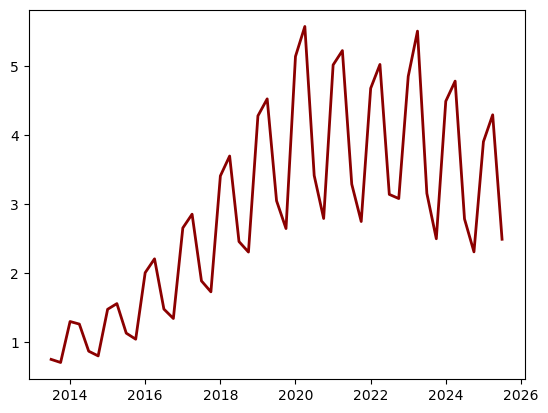

In [106]:
# Use the ratio column for plotting
plt.plot(df_clean.index, df_clean['Default-to-Repayment Ratio'], 
         label='Default-to-Repayment Ratio', color='darkred', linewidth=2)


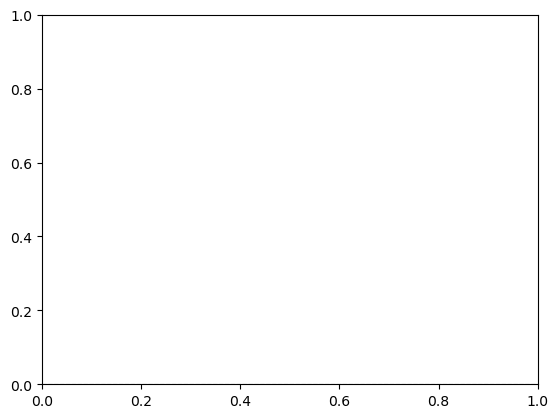

In [107]:
# Mark the zero-line for context (optional, but helpful if ratio drops very low)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)


C:\Users\KARAN SANJAY DUKARE\AppData\Local\Temp\ipykernel_25200\1200408837.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


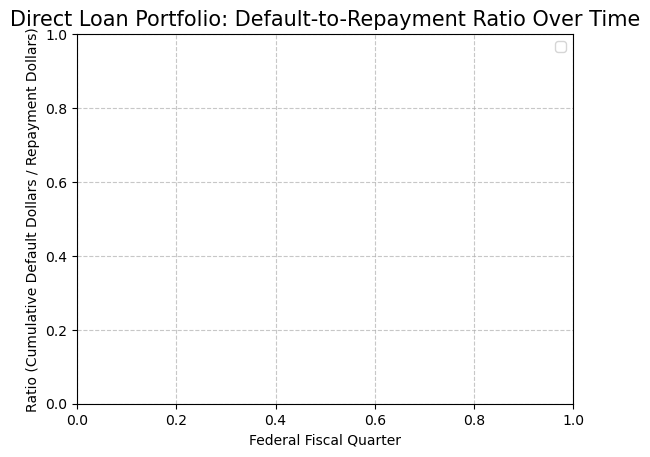

In [108]:
# Formatting
plt.title('Direct Loan Portfolio: Default-to-Repayment Ratio Over Time', fontsize=15)
plt.xlabel('Federal Fiscal Quarter')
plt.ylabel('Ratio (Cumulative Default Dollars / Repayment Dollars)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

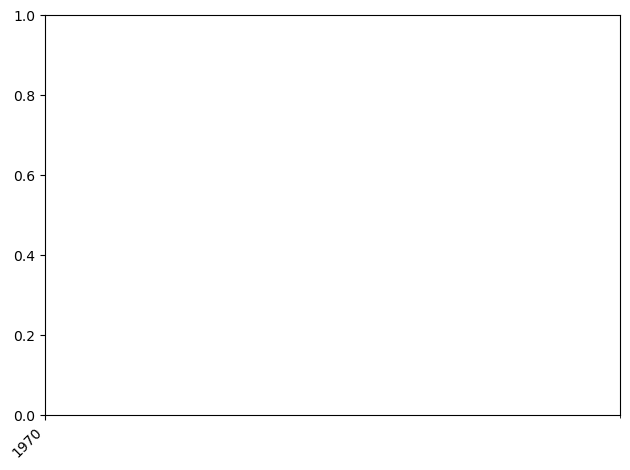

In [109]:
# Customize X-axis ticks for better readability (Yearly ticks)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3)) # Quarterly marks

plt.xticks(rotation=45, ha='right')
plt.tight_layout()


In [110]:
# Save the plot
plt.savefig('default_to_repayment_ratio.png')

print("Default-to-Repayment Ratio calculated and plot saved to 'default_to_repayment_ratio.png'.")

Default-to-Repayment Ratio calculated and plot saved to 'default_to_repayment_ratio.png'.


<Figure size 640x480 with 0 Axes>

Question 9

Q9. PSLF Employment Certification Approval Rate

    File(s) Used: ECF_Report.csv

Question: Evaluate the success rate of Public Service Loan Forgiveness (PSLF) Employment Certification Forms (ECFs).

1.	Load and clean the ECF_Report.csv file, converting all counts to numerical data.
2.	For each period, calculate the ECF Approval Rate as: $$\text{Approval Rate} = \frac{\text{Total Approved ECFs}}{\text{Total Approved ECFs} + \text{Total Denied ECFs}}$$
3.	Visualize the Approval Rate over time using a line plot.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [111]:
# --- 1. Load and Initial Clean ---
file_path = 'ECF_Report.csv'
# Load with header=4 (index 4) based on snippet inspection, using cp1252 for encoding
df = pd.read_csv(file_path, header=4, skipinitialspace=True, encoding='cp1252')

In [112]:
# Define columns (by index) and their intended names
COL_YEAR_IDX = 0
COL_QUARTER_IDX = 1
COL_APPROVED_IDX = 2
COL_DENIED_IDX = 3

In [113]:
# Select relevant columns and rename them
df = df.iloc[:, [COL_YEAR_IDX, COL_QUARTER_IDX, COL_APPROVED_IDX, COL_DENIED_IDX]].copy()
df.columns = ['Calendar Year', 'Quarter', 'Total Approved ECFs', 'Total Denied ECFs']

In [ ]:
# Forward fill the Calendar Year
df['Calendar Year'] = df['Calendar Year'].ffill()

In [114]:
# Drop rows that are entirely empty or have no data columns (after ffill)
df = df.dropna(subset=['Total Approved ECFs', 'Total Denied ECFs']).reset_index(drop=True)


In [115]:
# --- 2. Clean and Convert Counts to Numeric ---

def clean_count_column(series):
    # Remove commas, strip leading/trailing spaces, and remove quotes
    series = series.astype(str).str.replace(r'[,"\s]', '', regex=True)
    # Convert to numeric, coercing errors to NaN
    return pd.to_numeric(series, errors='coerce')

df['Approved'] = clean_count_column(df['Total Approved ECFs'])
df['Denied'] = clean_count_column(df['Total Denied ECFs'])


In [116]:
# Drop any rows where numeric conversion failed
df = df.dropna(subset=['Approved', 'Denied'])

In [117]:
# --- 3. Filter Non-Year Rows and Calculate Approval Rate/Time Index ---

# Filter out non-year rows (like 'TOTAL') that may have been ffilled
# Coerce to numeric, setting errors='coerce' will turn non-numeric values (like 'TOTAL') into NaN
df['Calendar Year'] = pd.to_numeric(df['Calendar Year'], errors='coerce')
# Drop rows where Calendar Year is now NaN
df = df.dropna(subset=['Calendar Year'])


In [118]:
# Calculate the Approval Rate
df['ECF Approval Rate'] = df['Approved'] / (df['Approved'] + df['Denied'])

In [119]:
# Create a consistent time column for yearly and quarterly data
def create_date_string(row):
    # Calendar Year is now a float, convert to int for clean year string
    year = str(int(row['Calendar Year']))
    quarter = str(row['Quarter']).strip()
    
    if 'Q' in quarter:
        # Quarterly data (e.g., '2015', 'Q1') -> use the quarter
        return f"{year}-{quarter}"
    else:
        # Yearly data (e.g., '2014', NaN) -> assume year-end (Q4) for yearly totals
        return f"{year}-Q4"

df['Time Period'] = df.apply(create_date_string, axis=1)


In [120]:
# Convert Time Period string to actual date objects for plotting
df['Date'] = pd.to_datetime(
    df['Time Period']
    .str.replace('Q1', '01-01')
    .str.replace('Q2', '04-01')
    .str.replace('Q3', '07-01')
    .str.replace('Q4', '10-01'),
    format='%Y-%m-%d'
)
df = df.set_index('Date').sort_index()


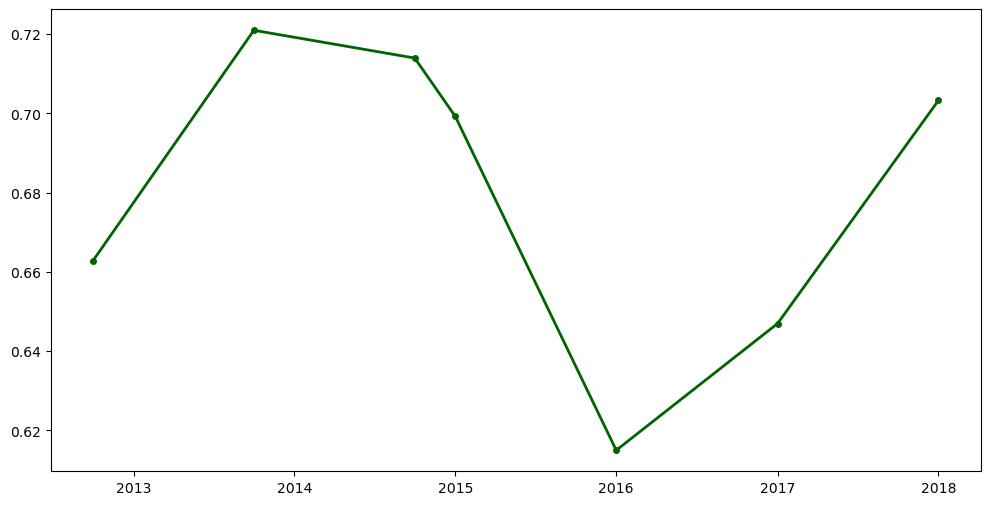

In [121]:
# --- 4. Plot the Approval Rate Over Time ---

plt.figure(figsize=(12, 6))

plt.plot(df.index, df['ECF Approval Rate'], 
         label='ECF Approval Rate', color='darkgreen', linewidth=2, marker='o', markersize=4)


Text(0, 0.5, 'Approval Rate (Approved / (Approved + Denied))')

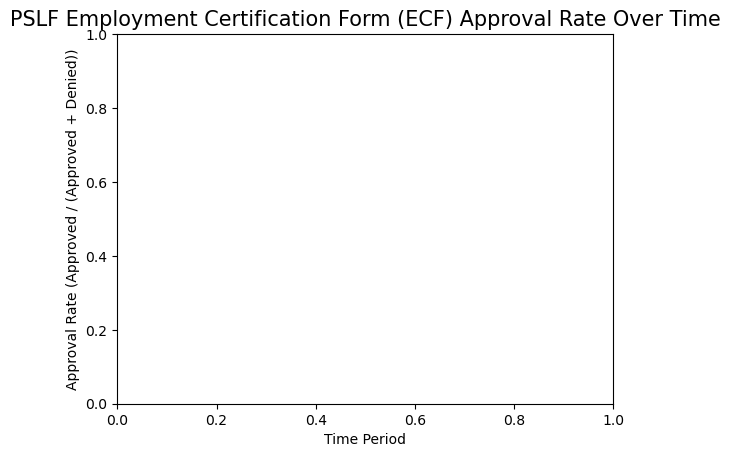

In [122]:
# Formatting
plt.title('PSLF Employment Certification Form (ECF) Approval Rate Over Time', fontsize=15)
plt.xlabel('Time Period')
plt.ylabel('Approval Rate (Approved / (Approved + Denied))')

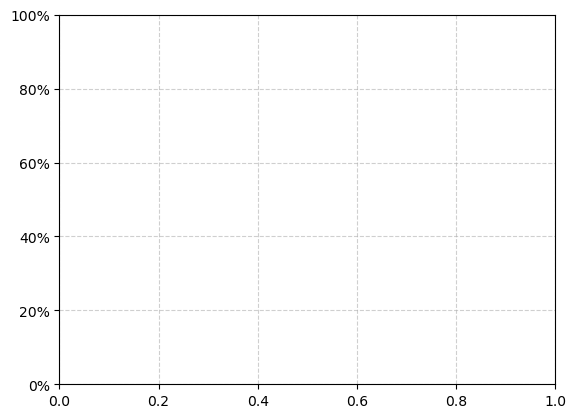

In [123]:
# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0%}'.format))
plt.ylim(0, 1.0) # Set y-limit from 0% to 100%

plt.grid(True, linestyle='--', alpha=0.6)

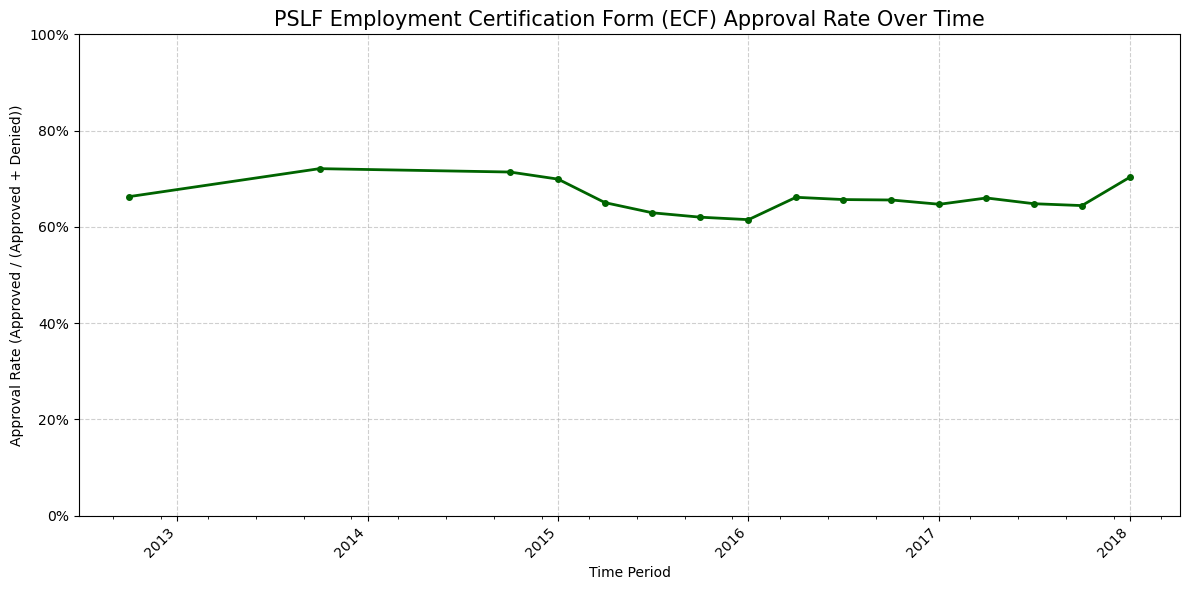

In [77]:
# Customize X-axis ticks for better readability (Yearly ticks)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=3)) # Quarterly marks

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('pslf_ecf_approval_rate.png')

Question 10

Q10. Loan Type and Recipient Count

    File(s) Used: Portfolio_by_Loan_Type.csv

Question: Investigate the relationship between loan volume and borrower count for different loan types.

1.	Load and clean the Portfolio_by_Loan_Type.csv file.
2.	For the latest fiscal quarter, calculate the Average Loan Size Per Recipient (Dollars Outstanding / Recipients) for:
    o	Stafford (Combined)
    o	Grad PLUS
    o	Parent PLUS
3.	Create a bar chart to compare the average loan size across these three categories.


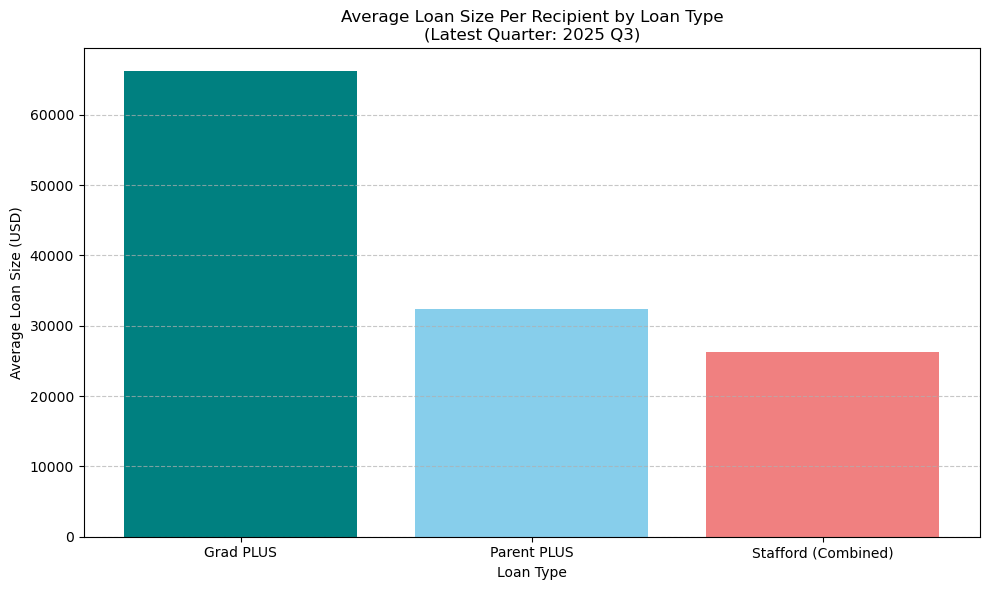

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file, assuming header is at row 6 (index 5) to capture the main category names
df = pd.read_csv('Portfolio_by_Loan_Type.csv', header=5)

# Drop columns that are all NaN and select only columns up to 'Consolidation - Recipients'
df = df.iloc[:, :16].copy()

# Define a mapping for the new column names by combining the high-level category and the metric from the first data row
new_columns = {
    df.columns[0]: 'Federal Fiscal Year',
    df.columns[1]: 'Quarter',
    df.columns[6]: 'Stafford (Combined) - Dollars Outstanding (in billions)',
    df.columns[7]: 'Stafford (Combined) - Unique Recipients (in millions)',
    df.columns[8]: 'Grad PLUS - Dollars Outstanding (in billions)',
    df.columns[9]: 'Grad PLUS - Recipients (in millions)',
    df.columns[10]: 'Parent PLUS - Dollars Outstanding (in billions)',
    df.columns[11]: 'Parent PLUS - Recipients (in millions)'
}

# Apply the new column names and select only the relevant columns
df = df.rename(columns=new_columns)[list(new_columns.values())]

# The first row of the loaded DF is a redundant header; remove it and clean the rest of the data
df = df.iloc[1:].copy()
df = df.dropna(subset=['Federal Fiscal Year', 'Quarter']).copy()

# Convert the 'Dollars Outstanding' and 'Recipients' columns to numeric
cols_to_clean = [col for col in df.columns if 'Dollars Outstanding' in col or 'Recipients' in col]

for col in cols_to_clean:
    # Remove '$', ',', and convert to numeric, coercing errors (NaN for non-numeric values)
    df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Identify the latest fiscal quarter by sorting
quarter_map = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
df['Quarter_Sort'] = df['Federal Fiscal Year'].astype(str) + df['Quarter'].map(quarter_map).astype(str).str.zfill(1)
latest_data = df.sort_values(by='Quarter_Sort', ascending=False).iloc[0]

# Function to calculate Average Loan Size Per Recipient
# The calculation is (Dollars in Billions / Recipients in Millions) * 1000
def calculate_avg_loan_size(loan_type, df_row):
    dollars_col = f'{loan_type} - Dollars Outstanding (in billions)'
    # Stafford uses 'Unique Recipients', others use 'Recipients'
    recipients_col = f'{loan_type} - {"Unique Recipients" if "Stafford" in loan_type else "Recipients"} (in millions)'
    
    dollars_billions = df_row[dollars_col]
    recipients_millions = df_row[recipients_col]
    
    if recipients_millions == 0 or pd.isna(recipients_millions) or pd.isna(dollars_billions):
        return pd.NA
    return (dollars_billions / recipients_millions) * 1000

loan_types = ['Stafford (Combined)', 'Grad PLUS', 'Parent PLUS']
avg_loan_sizes = {}

for loan_type in loan_types:
    avg_size = calculate_avg_loan_size(loan_type, latest_data)
    avg_loan_sizes[loan_type] = avg_size

# Prepare data for the chart
avg_loan_df = pd.DataFrame(list(avg_loan_sizes.items()), columns=['Loan Type', 'Average Loan Size (USD)'])
avg_loan_df = avg_loan_df.dropna().sort_values(by='Average Loan Size (USD)', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_loan_df['Loan Type'], avg_loan_df['Average Loan Size (USD)'], color=['teal', 'skyblue', 'lightcoral'])
plt.title(f"Average Loan Size Per Recipient by Loan Type\n(Latest Quarter: {latest_data['Federal Fiscal Year']} {latest_data['Quarter']})")
plt.ylabel("Average Loan Size (USD)")
plt.xlabel("Loan Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('average_loan_size_by_type.png')

Question 11

Q11. State-Level FFEL Subsidized Loan Distribution

    File(s) Used: FL_Dashboard_Q1.csv, FL_Dashboard_Q2.csv, FL_Dashboard_Q3.csv, FL_Dashboard_Q4.csv

Question: Determine the states with the highest FFEL activity.

1.	Aggregate the quarterly FFEL dashboard files (as in Question 7, step 1) to find the total 2009-2010 Award Year FFEL Subsidized Loan Dollars Originated by State (State column).
2.	Create a bar chart showing the total FFEL Subsidized Dollars originated for the Top 15 states.


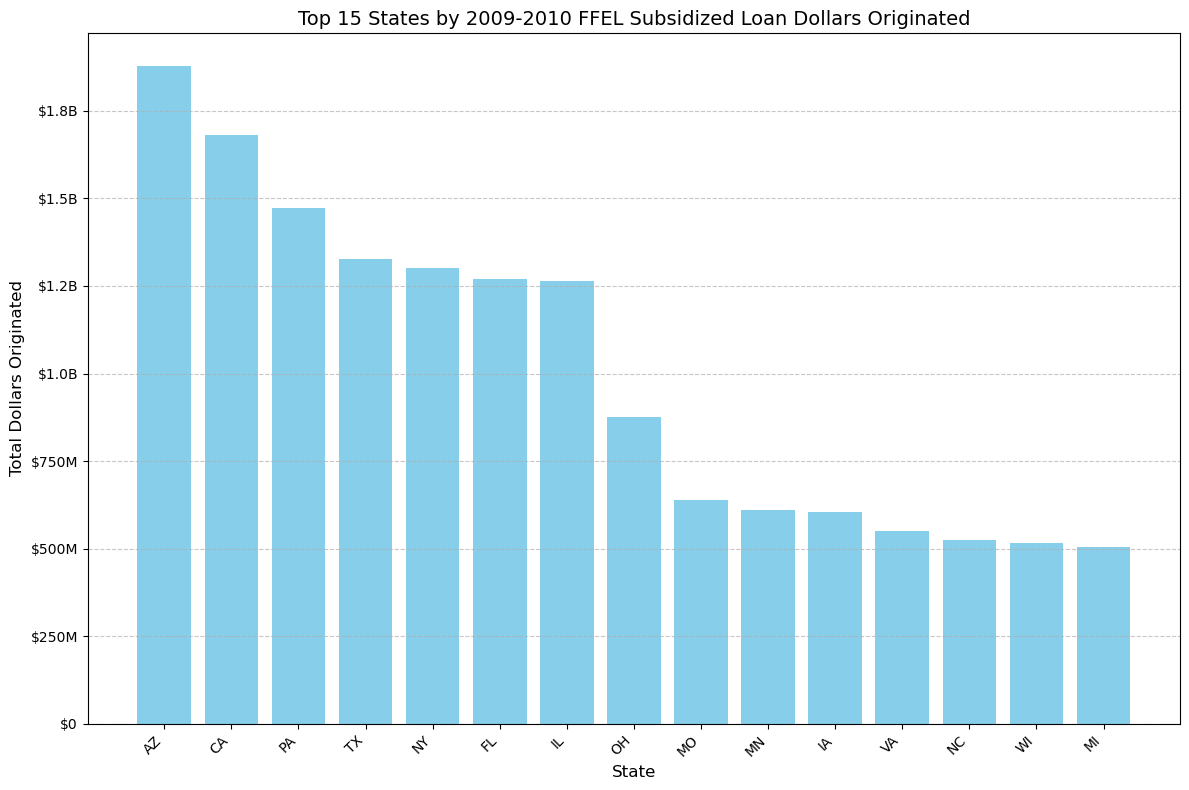

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Column indices for State and FFEL Subsidized $ of Loans Originated (based on header=5)
STATE_COL_INDEX = 2
SUBSIDIZED_DOLLARS_COL_INDEX = 7
SUBSIDIZED_DOLLARS_NEW_NAME = 'FFEL Subsidized Dollars'
STATE_NEW_NAME = 'State'

# 1. Aggregate the quarterly FFEL dashboard files
file_names = ['FL_Dashboard_Q1.csv', 'FL_Dashboard_Q2.csv', 'FL_Dashboard_Q3.csv', 'FL_Dashboard_Q4.csv']
all_data = []

for file in file_names:
    # Load file, using header=5 to capture the descriptive column names
    df = pd.read_csv(file, header=5)
    
    # Rename the relevant columns explicitly using their index
    df.rename(columns={
        df.columns[STATE_COL_INDEX]: STATE_NEW_NAME,
        df.columns[SUBSIDIZED_DOLLARS_COL_INDEX]: SUBSIDIZED_DOLLARS_NEW_NAME
    }, inplace=True)

    # Select only the needed columns for aggregation
    all_data.append(df[[STATE_NEW_NAME, SUBSIDIZED_DOLLARS_NEW_NAME]].copy())

# Concatenate all quarterly data into a single DataFrame
df_combined = pd.concat(all_data, ignore_index=True)

# 2. Clean the dollars column and calculate totals
df_combined.dropna(subset=[STATE_NEW_NAME], inplace=True)

# Clean the dollars column: remove non-numeric characters and convert to float
df_combined[SUBSIDIZED_DOLLARS_NEW_NAME] = (
    df_combined[SUBSIDIZED_DOLLARS_NEW_NAME]
    .astype(str)
    .str.replace(r'[\$,\s-]', '', regex=True) # Remove $, comma, whitespace, and hyphens
)
df_combined[SUBSIDIZED_DOLLARS_NEW_NAME] = pd.to_numeric(
    df_combined[SUBSIDIZED_DOLLARS_NEW_NAME], errors='coerce'
)
df_combined.dropna(subset=[SUBSIDIZED_DOLLARS_NEW_NAME], inplace=True)


# Group by State and sum the dollars originated
state_totals = df_combined.groupby(STATE_NEW_NAME)[SUBSIDIZED_DOLLARS_NEW_NAME].sum().reset_index()
state_totals.rename(columns={SUBSIDIZED_DOLLARS_NEW_NAME: 'Total FFEL Subsidized Dollars Originated'}, inplace=True)

# 3. Identify the Top 15 states
top_15_states = state_totals.sort_values(
    by='Total FFEL Subsidized Dollars Originated', 
    ascending=False
).head(15)

# 4. Create a bar chart for the Top 15 states
plt.figure(figsize=(12, 8))

# Define a function to format currency for the y-axis
def currency_formatter(x, pos):
    if x >= 1e9:
        return f'${x/1e9:.1f}B'
    elif x >= 1e6:
        return f'${x/1e6:,.0f}M'
    return f'${x:,.0f}'

# Create the bar chart
plt.bar(
    top_15_states[STATE_NEW_NAME], 
    top_15_states['Total FFEL Subsidized Dollars Originated'], 
    color='skyblue'
)

# Apply formatting
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Top 15 States by 2009-2010 FFEL Subsidized Loan Dollars Originated', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Dollars Originated', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_15_ffel_subsidized_loan_distribution.png')

Question 12

Q12. Deferment Status Recipient Comparison (DL vs. FFEL)

    File(s) Used: DL_by_Deferment_Type.csv, FFEL_by_Deferment-Type.csv

Question: Compare the utilization of specific deferment types between the Direct Loan and FFEL programs.

1.	Load and clean DL_by_Deferment_Type.csv and FFEL_by_Deferment-Type.csv.
2.	Extract and plot the trend of Recipients in Unemployment Deferment over time for both Direct Loans and FFEL.
3.	Comment on how the number of recipients in this deferment status compares between the two loan programs


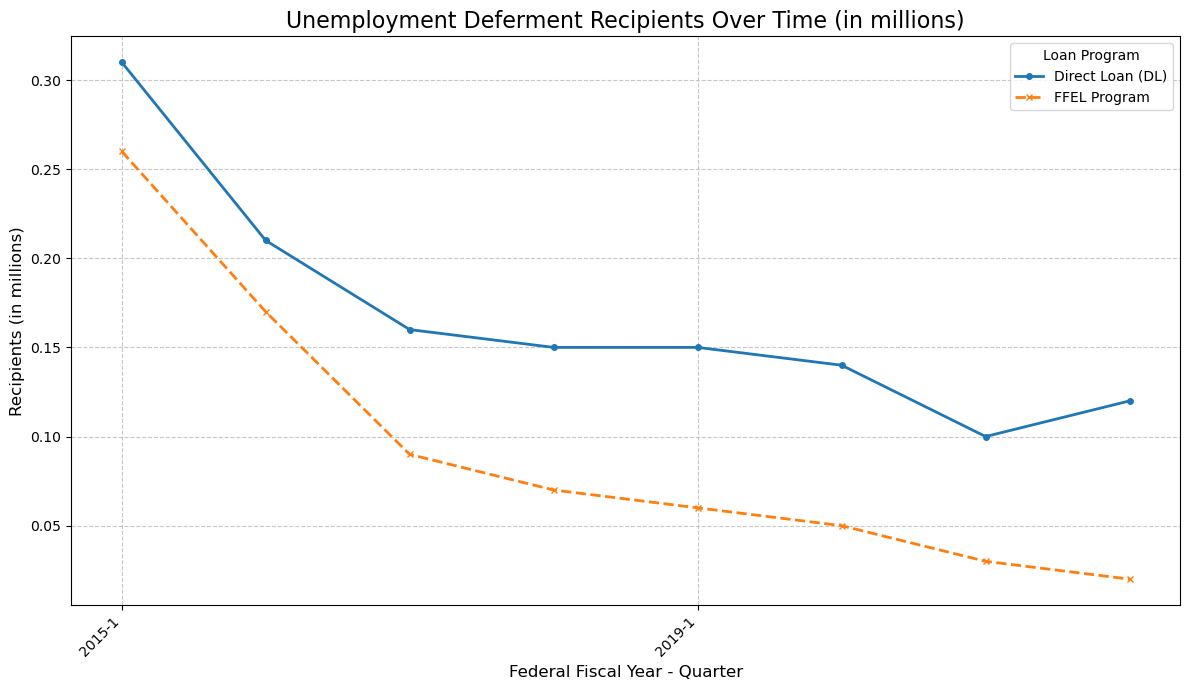

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

# Column indices (based on header=5)
YEAR_COL_IDX = 0
QUARTER_COL_IDX = 1
UNEMPLOYMENT_RECIPIENTS_IDX = 7

def load_and_clean_data(file_name, loan_type):
    """Loads, cleans, and extracts Unemployment Deferment recipient data, using latin-1 encoding."""
    # Added encoding='latin-1' to resolve UnicodeDecodeError
    df = pd.read_csv(file_name, header=5, encoding='latin-1')

    # Rename the necessary columns using their indices
    df.rename(columns={
        df.columns[YEAR_COL_IDX]: 'Federal Fiscal Year',
        df.columns[QUARTER_COL_IDX]: 'Quarter',
        df.columns[UNEMPLOYMENT_RECIPIENTS_IDX]: f'{loan_type}_Unemployment_Recipients_Millions'
    }, inplace=True)

    # Select only the relevant columns and clean time columns
    df_clean = df[['Federal Fiscal Year', 'Quarter', f'{loan_type}_Unemployment_Recipients_Millions']].copy()
    df_clean.dropna(subset=['Federal Fiscal Year', 'Quarter'], inplace=True)
    df_clean = df_clean[pd.to_numeric(df_clean['Federal Fiscal Year'], errors='coerce').notna()]
    
    # Clean the recipients column and convert to float
    recipients_col = f'{loan_type}_Unemployment_Recipients_Millions'
    df_clean[recipients_col] = (
        df_clean[recipients_col]
        .astype(str)
        .str.replace(r'[^\d\.\-]', '', regex=True)
    )
    df_clean[recipients_col] = pd.to_numeric(df_clean[recipients_col], errors='coerce')
    
    return df_clean

# Load and clean data for both programs
df_dl = load_and_clean_data('DL_by_Deferment_Type.csv', 'DL')
df_ffel = load_and_clean_data('FFEL_by_Deferment-Type.csv', 'FFEL')

# Merge the two DataFrames
df_merged = pd.merge(
    df_dl, 
    df_ffel, 
    on=['Federal Fiscal Year', 'Quarter'], 
    how='inner'
)

# Convert Year and Quarter to a sortable time index
quarter_map = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
df_merged['Quarter_Num'] = df_merged['Quarter'].map(quarter_map)
df_merged['Year_Quarter'] = df_merged['Federal Fiscal Year'].astype(str) + '-' + df_merged['Quarter_Num'].astype(str).str.zfill(1)
df_merged.sort_values(by='Year_Quarter', inplace=True)

# Plotting the trend
plt.figure(figsize=(12, 7))

plt.plot(df_merged['Year_Quarter'], df_merged['DL_Unemployment_Recipients_Millions'], label='Direct Loan (DL)', marker='o', linestyle='-', linewidth=2, markersize=4)
plt.plot(df_merged['Year_Quarter'], df_merged['FFEL_Unemployment_Recipients_Millions'], label='FFEL Program', marker='x', linestyle='--', linewidth=2, markersize=4)

plt.title('Unemployment Deferment Recipients Over Time (in millions)', fontsize=16)
plt.xlabel('Federal Fiscal Year - Quarter', fontsize=12)
plt.ylabel('Recipients (in millions)', fontsize=12)
plt.xticks(
    df_merged['Year_Quarter'][::4], 
    rotation=45, 
    ha='right'
)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Loan Program', fontsize=10)
plt.tight_layout()
plt.savefig('unemployment_deferment_comparison.png')